# [SWCON25301] Machine Learning
Teaching Assistant: Suyong Bahk (clapd10@khu.ac.kr), 

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P1:  Linear/Polynomial Regression Model (10점)

### 학습목표
- 실습에 필요한 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해한다.
- Python, NumPy로 작성된 Linear Regression Model을 분석하고 이해한다.
- Python, NumPy로 Polynomial Regression Model class를 직접 작성하고 분석한다.

### 실습내용

실습은 다음 순서로 진행됩니다.
학생분들께서는 **<구현>** 과 **<작성>** 에 해당하는 부분을 수행해주시면 됩니다.

- S1. Linear Regression Model 구현 및 분석
    - 1) 패키지 import
    - 2) 데이터셋 생성
    - 3) Linear Regression Model 구현
    - 4) 학습 및 결과 시각화

<br>

- S2. Polynomial Regression Model 구현 및 분석
    - 1) Polynomial Regression Model 구현 **<구현>** 
    - 2) 학습 및 결과 시각화
    - 3) Polynomial Regression Model 분석 **<구현>** 

<br>

- S3. Discussion **<작성>**


--- 

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록 합니다.


### 점수
- 2-1) Polynomial regression model class 구현: **4점**
- 2-3) Polynomial Regression Model 분석: **4점**
- Discussion: **2점**  
**- 단, 2-1) 하단의 답안 미 작성 시 과제 점수 감점이 있으므로 꼭 작성 후 제출하세요.** 

### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> Download/export as -> HTML)도 함께 제출하세요. 하나만 제출할시 2점 감점이 있습니다.

---

## S1. Linear regression model 분석

S1에서는 2차원 평면 상의 데이터에 대하여 해당 데이터를 잘 표현할 수 있는 선형 회귀 모델(Linear Regression Model)을 학습하고 평가합니다.

### 1-1) Import packages
**수정하지 마세요.**

In [1]:
from random import random as rand
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1-2) Loading the Dataset
**수정하지 마세요.** 

학습과 테스트에 사용할 데이터를 생성합니다.

In [2]:
# Random seed
random.seed(1234)

# Generate 2-dimensional data points
X = [rand() * i * 0.5 - 20 for i in range(0, 100)]
y = [x**3 * 0.002 - x**2 * 0.005 + x * 0.003 + rand() * 5 for x in X]
print(len(X), len(y))

100 100


Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [3]:
# Data random shuffle
idx = list(range(len(X)))
random.shuffle(idx)

# Split data for train/test
X_train, X_test = [X[i] for i in idx[:80]], [X[i] for i in idx[80:]]
y_train, y_test = [y[i] for i in idx[:80]], [y[i] for i in idx[80:]]

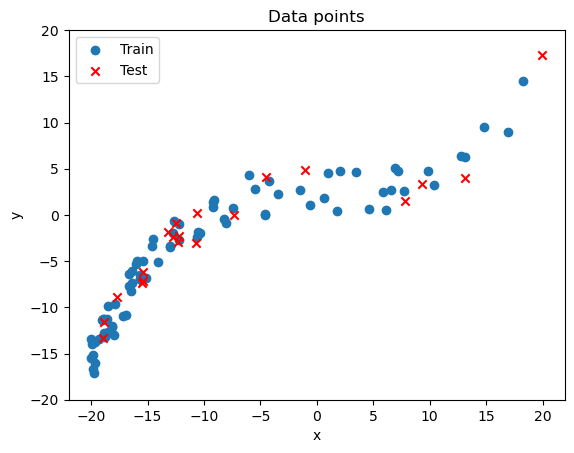

In [4]:
# 학습 데이터를 시각화하여 분포를 확인
plt.scatter(
    [i for idx, i in enumerate(X_train)],
    [i for idx, i in enumerate(y_train)],
    label="Train",
    marker="o",
)

plt.scatter(
    [i for idx, i in enumerate(X_test)],
    [i for idx, i in enumerate(y_test)],
    label="Test",
    marker="x",
    color="r",
)

plt.title("Data points")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-20, 20])
plt.legend()
plt.show()

### 1-3) Linear Regression Model 구현

**수정하지 마세요.** 

`Linear` class는 다음 함수들로 이루어져 있습니다.
- `__init__` 생성자에서는 model의 weights와 bias를 초기화합니다.
- `calc_loss_and_gradient`는 input과 output 사이의 MSE loss와 그 gradient를 계산합니다.
- `shuffle_datasets`는 데이터셋을 섞는 역할을 합니다.
- `forward`에서는 input을 model의 가중치를 이용해서 예측을 수행합니다.
- `update_parameters`에서는 계산된 MSE loss와 그 gradient를 입력으로 받아 모델의 가중치를 업데이트 합니다.  
(Tip : update_parameters는 딥러닝 라이브러리에서 backward pass로도 불립니다.)
- `fit`에서는 model을 학습하는 과정으로 `forward`와 `update_parameters`를 차례로 반복하여 model의 가중치를 업데이트 합니다.
- `predict`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다.


In [5]:
class Linear:
    def __init__(self, batch_size, lr=1e-5):
        # initialization with a numpy array type
        self.weight = np.array(rand())
        self.bias = 0  # initialization
        self.lr = lr  # learning rate
        self.batch_size = batch_size

    def shuffle_datasets(self, a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]

    def fit(self, x, y, epochs):
        x_arr = np.array(x)
        y_arr = np.array(y)
        for e in range(epochs):  # epochs 만큼 학습
            # shuffle dataset
            x, y = self.shuffle_datasets(x_arr, y_arr)

            # 배치 크기씩 data 분할
            num_batches = len(x) // self.batch_size
            remain = (
                len(x) % self.batch_size
            )  # batch size 크기의 배수가 아닌 나머지 training example 개수
            x = x[remain:]  # remain을 제외한 training example만 사용
            y = y[remain:]
            x = np.array_split(x, num_batches)  # 배치 크기씩 데이터 분할
            y = np.array_split(y, num_batches)

            # 각 배치마다 파라미터 업데이트
            for batch_x_y in zip(x, y):  # 배치 하나씩 학습
                batch_x, batch_y = batch_x_y

                pred = self.forward(batch_x)
                loss, gradient_weight, gradient_bias = self.calc_loss_and_gradient(
                    pred, batch_y, batch_x
                )

                # parameter update는 backward pass로도 불림
                self.update_parameters(gradient_weight, gradient_bias)

    def forward(self, x):
        prediction = self.weight * x + self.bias  # linear regression 모델의 출력을 계산
        return prediction

    def calc_loss_and_gradient(self, pred, y, x):
        # computes the prediction error and its derivative
        loss = np.mean((pred - y) ** 2)  # MSE loss
        gradient_weight = np.mean((pred - y) * 2) * x  # MSE loss의 gradient
        gradient_bias = np.mean((pred - y) * 2)
        return loss, gradient_weight, gradient_bias

    def update_parameters(self, gradient_weight, gradient_bias):
        self.weight -= gradient_weight.mean() * self.lr
        self.bias -= gradient_bias * self.lr

    def predict(self, x_test):
        # 학습이 끝난 모델의 출력을 얻기 위한 함수
        # computes the predictions with forward()
        predictions = [self.forward(x_) for x_ in x_test]
        return predictions  # list type

### 1-4) 학습 및 결과 시각화
**수정하지 마세요.**

작성한 `Linear` class와 Trainset을 이용해 1차 선형 회귀 모델을 학습시키고 학습된 모델의 평가 결과를 시각화합니다.

In [6]:
# Define a model
linear = Linear(batch_size=1)  #  위에서 구현한 Linear regression model 모델 생성

# Training
linear.fit(X_train, y_train, 100)  #  100 epoch 학습

# Print weight and bias
print(f"weight: {linear.weight:0.6f}")
print(f"bias: {linear.bias:0.6f}")

weight: 0.534928
bias: 0.147831


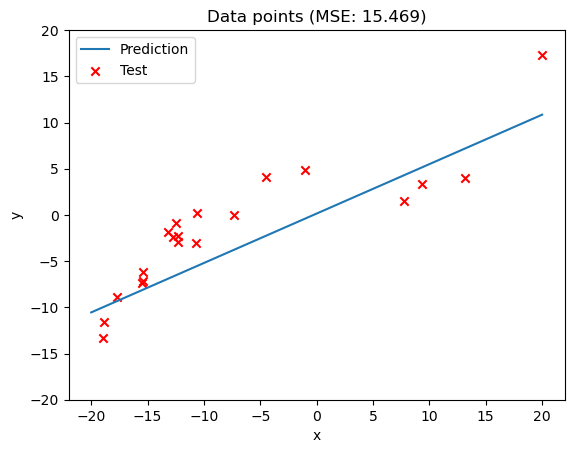

In [7]:
def plot(model):
    # Range of X
    x = np.linspace(-20, 20, 50)

    # Plotting model
    plt.plot(x, model.forward(x), label="Prediction")

    # Plotting test data points
    plt.scatter(
        [i for idx, i in enumerate(X_test)],
        [i for idx, i in enumerate(y_test)],
        label="Test",
        marker="x",
        color="r",
    )

    # Calculate MSE (Mean Square Error) of test data
    y_pred = model.predict(X_test)
    mse = sum([(label - pred) ** 2 for pred, label in zip(y_pred, y_test)]) / len(
        X_test
    )

    plt.title(f"Data points (MSE: {mse:0.3f})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim([-20, 20])
    plt.legend()
    plt.show()


plot(linear)

## S2. Polynomial Regression Model

1차 Linear Regression Model은 1차 Polynomial Regression Model과 동일하다고 볼 수 있습니다. 

S2에서는 입력 파라메터에 따라 1차 이상의 차수를 가진 Polynomial Regression Model을 반환하는 `Polynomial` class를 구현합니다.

S1에서 작성된 `Linear` class를 참고하여 구현하시면 됩니다.

`Polynomial` class는 다음 함수들로 이루어져 있습니다.
- `__init__` 생성자에서는 model의 weights와 bias를 초기화합니다.
- `calc`는 계수와 차수, 데이터를 입력받아 각 항을 계산합니다.
- `calc_loss_and_gradient`는 input과 output 사이의 MSE loss와 그 gradient를 계산합니다.
- `shuffle_datasets`는 데이터셋을 섞는 역할을 합니다.
- `forward`에서는 input을 model의 가중치를 이용해서 예측을 수행합니다.
- `update_parameters`에서는 계산된 MSE loss와 그 gradient를 입력으로 받아 모델의 가중치를 업데이트 합니다.  
(Tip : update_parameters는 딥러닝 라이브러리에서 backward pass로도 불립니다.)
- `fit`에서는 model을 학습하는 과정으로 `forward`와 `update_parameters`를 차례로 반복하여 model의 가중치를 업데이트 합니다.
- `predict`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다.

학생분들께서는 `Polynomial` class 내의 함수 중 `forward`과 `update_parameters`을 일부 작성하게 됩니다. 

### 2-1) Polynomial Regression Model 구현 <직접구현>
`<your code>` 부분을 작성하여 class를 완성하세요. **(4점, 각 2점)**

단, Feature Normalization은 고려하지 않아도 됩니다.

In [30]:

class Polynomial():
    def __init__(self, dim, batch_size, lr=1e-5):
        self.dim = dim
        # initialization with a numpy array type
        self.weights = np.array([rand() * 0.001 for i in range(self.dim)])
        self.bias = 2.5 # initialization
        self.lr = lr # learning rate
        self.batch_size = batch_size
    
    def calc(self, x, coeff, degree):
        return coeff * x ** degree
        
    def shuffle_datasets(self, a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]
        
    def fit(self, x, y, epochs):
        x_arr = np.array(x)
        y_arr = np.array(y)
        for e in range(epochs): # epochs 만큼 학습
            # shuffle dataset
            x, y = self.shuffle_datasets(x_arr, y_arr)

            # 배치 크기씩 data 분할
            num_batches = len(x) // self.batch_size
            remain = len(x) % self.batch_size # batch size 크기의 배수가 아닌 나머지 training example 개수
            x = x[remain:] # remain을 제외한 training example만 사용
            y = y[remain:]
            x = np.array_split(x, num_batches) # 배치 크기씩 데이터 분할
            y = np.array_split(y, num_batches)
            
            # 각 배치마다 파라미터 업데이트
            for batch_x_y in zip(x, y): # 배치 하나씩 학습
                batch_x, batch_y = batch_x_y

                pred = self.forward(batch_x) 
                loss, gradient_weight, gradient_bias = self.calc_loss_and_gradient(
                    pred, batch_y, batch_x
                )

                # parameter update는 backward pass로도 불림
                self.update_parameters(gradient_weight, gradient_bias)

    def predict(self, x):
        # computes the predictions with forward()
        predictions = [self.forward(x_) for x_ in x]
        return predictions # list type

    def forward(self, x):
        # computes the weighted sum of Polynomial regression model
        # Hint : sum([self.calc(...) for i in ...]) + self.bias 
        # prediction = # <your code>
        prediction = sum([self.calc(x, self.weights[i], i) for i in range(self.dim)]) + self.bias
        return prediction
    
    def calc_loss_and_gradient(self, pred, y, x):
        # computes the prediction error and its derivative
        loss = np.mean((pred - y) ** 2) # MSE loss
        # Hint : forward 문에서 작성했던 것과 유사한 형태의 list로 작성하세요.
        # gradient_weight = # <your code>
        # gradient_weight = [np.mean((pred - y) * 2 * x ** i) for i in range(self.dim)]
        gradient_weight = [[np.mean((pred - y) * 2 * x ** i)] for i in range(self.dim)]
        gradient_bias = np.mean((pred - y) * 2)
        # print(gradient_weight)
        return loss, gradient_weight, gradient_bias

    def update_parameters(self, gradient_weight, gradient_bias):
        self.weights -= np.array(gradient_weight).mean(1).reshape(self.dim) * self.lr
        self.bias -= gradient_bias * self.lr


**Q. 강의 내용과 연관지어 본인이 작성한 코드의 내용을 설명하세요. (미 작성시 과제 점수 감점)**  

forward 메소드는 predict메소드에서 호출되어 가중치를 예측하게 되는데, 이때 예측된 y값이 반환되게 됩니다. 
calc_loss_and_gradient메소드는 loss와 가중치의 gradient, 편향의 gradient를 반환합니다.
gradient_weight는 가중치 각각에 대해 편미분한 결과로 2 * 오류값 * x^i을 통해 차원수만큼 편미분을 진행하게 됩니다. 
gradient_weight를 구할 때, 원래는 1차원배열로 생성하였는데, weight의 차원이 맞지 않아 gradient_weight도 2차원 리스트로 만들어 주었습니다. 


### 2-2) 다항 회귀 모델 학습 및 결과 시각화
**수정하지 마세요.**

작성한 `Polynomial` class와 Trainset을 이용해 2차 다항 회귀 모델을 학습시키고 학습된 모델의 평가 결과를 시각화합니다.

In [31]:
# Model define and training

# Define a model
polynomial = Polynomial(
    dim=2, batch_size=1, lr=1e-6
)  #  위에서 구현한 Polynomial regression model 모델 정의

# Training
polynomial.fit(X_train, y_train, 100)  #  100 epoch 학습
# mse_test = np.mean(pred-y ** 2)
# Print weight and bias
for i, weight in enumerate(polynomial.weights):
    print(f"weight_{i+1}: {weight:0.6f}")
print(f"bias: {polynomial.bias:0.6f}")

weight_1: -0.035296
weight_2: 0.608787
bias: 2.464099


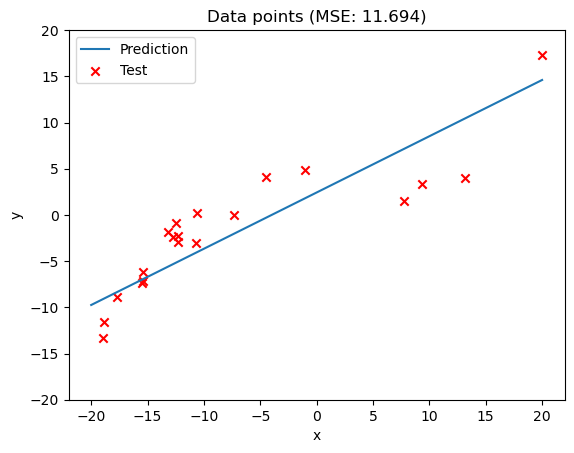

In [32]:
# Plots polynomial and data points
plot(polynomial)

### 2-3) 다항 회귀 모델 분석 

2-2)를 수정하여 1차부터 4차 다항 회귀 모델 중 주어진 데이터셋을 가장 잘 표현하는 차수의 모델 1개를 학습하고 결과를 시각화 하세요. **(4점, 부분점수 없음)**

- 2-2) 코드를 참고하여 작성합니다. (learning rate, dim, batch size, training epoch 등 변경)
- 다양한 시도를 통해 스스로 최적의 차수와 학습 조건을 찾아보세요. 
- 제출 시 MSE 기준 3 이하일 경우 정답으로 채점
- MSE 값이 nan 값인 경우 learning rate 파라메터를 조정하면 해결할 수 있습니다.

In [60]:
# Model define and training
# 위에서 구현한 Polynomial regression model 모델 정의


# Training
# <your code>

polynomial_2 = Polynomial(
    dim=4, batch_size=1, lr=1e-8
)  #  위에서 구현한 Polynomial regression model 모델 정의

# Training
polynomial_2.fit(X_train, y_train, 200)  #  100 epoch 학습

# Print weight and bias
for i, weight in enumerate(polynomial_2.weights):
    print(f"weight_{i+1}: {weight:0.6f}")
print(f"bias: {polynomial.bias:0.6f}")

weight_1: 0.000696
weight_2: 0.000882
weight_3: -0.004192
weight_4: 0.002079
bias: 2.464099


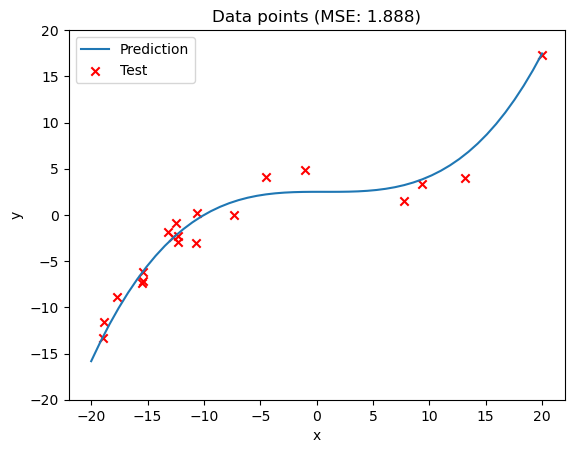

In [61]:
# Plotting polynomial and data points
# <your code>
plot(polynomial_2)

## S3. Discussion

**1) 본 실습에서 구현한 `Polynomial` class는 Feature Normalization을 사용하지 않았습니다.**

1. 본 실습에서의 상황을 예시로 Feature Normalization을 수행하는 방법을 설명하고,

2. 수업 시간에 배운 내용을 기반으로 Feature Normalization을 수행했을 때의 효과에 대해서 논하세요.

[답변작성]:

위와 같은 상황에서 만약 특성간 범위의 차이가 큰 경우에, 모델이 스케일이 큰 변수에 대해 과도하게 영향을 받을 수 있기 때문에 표준화, 정규화를 통해 범위를 적절하게 맞출 수 있습니다. 
Range Normalization을 통해 값의 범위를 비슷한 스케일 내에 있도록 만들어줄 수 있으며
Mean shifting으로 특성들의 평균을 0으로 맞춰줄 수 있습니다. 

Gradient Decent와 같은 알고리즘에서는 특성간의 스케일 차이로 인한 느린 학습속도를 향상시킬 수 있습니다. 


---

**2) 배치 크기에 따라 full batch, minibatch, online mode training을 할 수 있습니다. Polynomial class에서 각 mode로 학습해 본 다음, 관찰한 모델의 성능 및 학습 속도 등 차이를 자유롭게 설명하세요.**



[답변작성]:
full batch는 큰 문제는 없지만 데이터를 한번에 학습하기 때문에 학습 속도가 느려질 수 있고, 

online은 가중치를 매 데이터마다 입력해 업데이트하는 방식으로 데이터를 한번에 많이 불러오는게 아니기 때문에 메모리를 적게 사용한다. 따라서 학습 속도가 빠릅니다 

mini batch는 full batch와 online의 중간 옵션으로 full batch보다 빠른 학습 속도를 제공하면서, 메모리 사용량을 조절할 수 있습니다. 